<a href="https://colab.research.google.com/github/phoenix540/fraud_detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.shape



(7973, 31)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

In [5]:
df['Class'].value_counts()


,count
Class,
0.0,7947
1.0,25


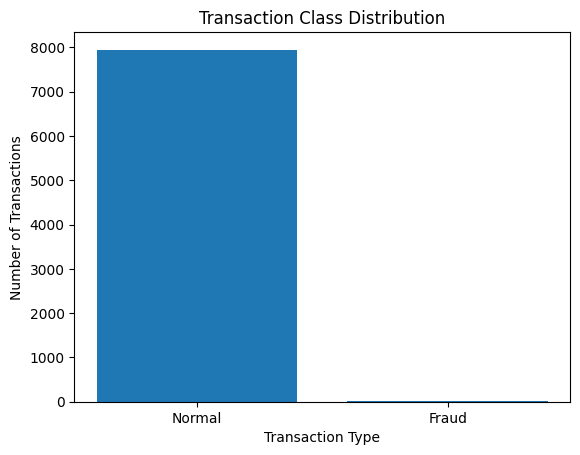

In [6]:
class_counts = df['Class'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.title("Transaction Class Distribution")
plt.xticks([0, 1], ["Normal", "Fraud"])
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.show()


In [7]:
fraud_percentage = df['Class'].mean() * 100
print(f"Fraud transactions: {fraud_percentage:.4f}%")


Fraud transactions: 0.3136%


The dataset is extremely imbalanced, with fraudulent transactions representing only a very small percentage of total transactions.
This confirms that accuracy alone is not a reliable evaluation metric, and specialized metrics such as precision, recall, and PR-AUC are required.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [15]:
import pandas as pd

# Check total NaNs in y
print("NaNs in Class column:", df['Class'].isna().sum())


NaNs in Class column: 1


In [16]:
# Drop rows where 'Class' is NaN
df = df.dropna(subset=['Class'])


In [17]:
y = df['Class'].astype(int)  # convert all values to int
X = df.drop('Class', axis=1)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keeps the same class distribution
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (6377, 30)
Test set size: (1595, 30)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
import matplotlib.pyplot as plt


In [20]:
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [21]:
y_probs = model.predict_proba(X_test)[:, 1]  # probability of class 1 (fraud)
y_pred = model.predict(X_test)               # default threshold 0.5


In [22]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0     1.0000    0.9994    0.9997      1590
           1     0.8333    1.0000    0.9091         5

    accuracy                         0.9994      1595
   macro avg     0.9167    0.9997    0.9544      1595
weighted avg     0.9995    0.9994    0.9994      1595

Confusion Matrix:

[[1589    1]
 [   0    5]]


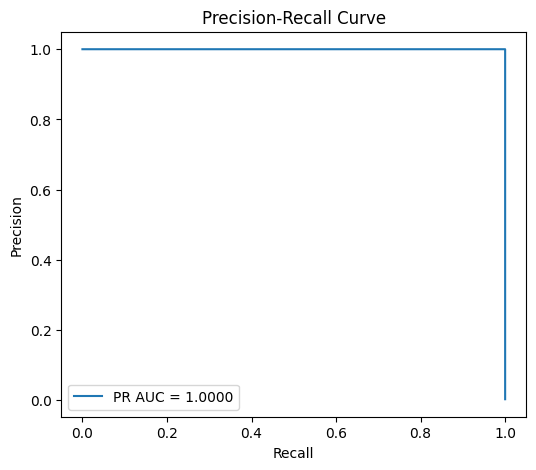

In [23]:
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


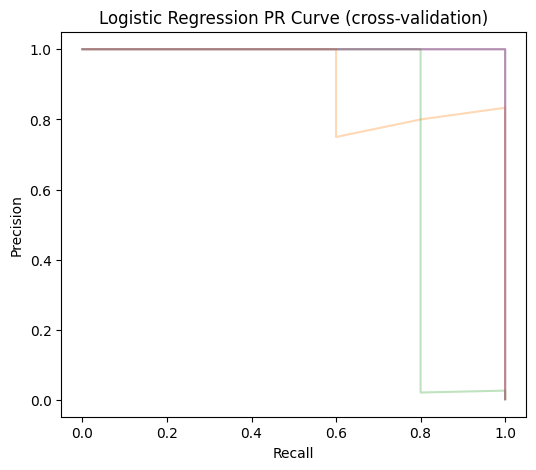

Mean PR AUC across folds: 0.9446635972989565


In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, auc

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
pr_aucs = []
plt.figure(figsize=(6,5))

for train_idx, test_idx in skf.split(X, y):
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

    model = LogisticRegression(class_weight='balanced', max_iter=4000, random_state=42)
    model.fit(X_tr, y_tr)
    y_probs = model.predict_proba(X_te)[:,1]

    precision, recall, _ = precision_recall_curve(y_te, y_probs)
    pr_aucs.append(auc(recall, precision))
    plt.plot(recall, precision, alpha=0.3)


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression PR Curve (cross-validation)')
plt.show()

print("Mean PR AUC across folds:", np.mean(pr_aucs))


In [27]:
from sklearn.ensemble import IsolationForest


In [29]:
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Only normal transactions for training
X_train_normal = X_train_scaled[y_train == 0]

iso_forest = IsolationForest(
    n_estimators=100,
    contamination=float(y_train.sum()/len(y_train)),  # fraction of frauds
    random_state=42
)

iso_forest.fit(X_train_normal)

IsolationForest(contamination=0.0031362709738121373, random_state=42)

In [31]:
y_pred_iso = iso_forest.predict(X_test_scaled)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)  # -1 : fraud, 1 : normal


In [33]:

print("Classification Report (Isolation Forest):\n")
print(classification_report(y_test, y_pred_iso, digits=4))

print("Confusion Matrix (Isolation Forest):\n")
print(confusion_matrix(y_test, y_pred_iso))


Classification Report (Isolation Forest):

              precision    recall  f1-score   support

           0     0.9975    0.9962    0.9969      1590
           1     0.1429    0.2000    0.1667         5

    accuracy                         0.9937      1595
   macro avg     0.5702    0.5981    0.5818      1595
weighted avg     0.9948    0.9937    0.9943      1595

Confusion Matrix (Isolation Forest):

[[1584    6]
 [   4    1]]


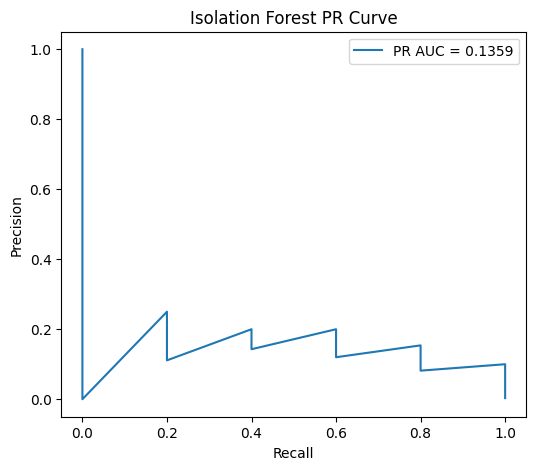

In [35]:
scores = iso_forest.decision_function(X_test_scaled)
precision, recall, _ = precision_recall_curve(y_test, -scores)  # negative = anomaly
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Isolation Forest PR Curve')
plt.legend()
plt.show()

⚠️ Note:
Isolation Forest shows very high accuracy but low PR-AUC (~0.13) because the dataset is extremely imbalanced.
Accuracy is dominated by normal transactions.
PR-AUC is the more meaningful metric for detecting frauds, highlighting that Isolation Forest catches only a small fraction of actual frauds.

In contrast, Logistic Regression (supervised) achieves a much higher PR-AUC (~0.92) because it learns from labeled fraud examples.